<a href="https://www.kaggle.com/code/smitraval24/eda-baseline-xgb-lgbm-catboost-pipelines?scriptVersionId=162627300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0; margin-top: 8px;">
        <img src="https://themedicalbiochemistrypage.org/wp-content/uploads/2020/05/obesity-title-image.jpg" alt="Image" style="max-width: 300px; max-height: 350px;" />
    </div>
    <div style="flex: 1; margin-left: 30px; margin-top: 6px">
        <p style="font-weight: bold; color: black; font-size: 17px">Introduction</p>
        <p>
            This is Beginner friendly notebook, aims to conduct Exploratory Data Analysis on the Multi-Class Prediction of Obesity Risk Dataset. It progresses to training <b>XGBoost</b>, <b>CatBoost</b>, and <b>LightGBM</b> models using the <b>Pipelines</b>, aiming to improve predictions through fine-tuning these models.
        </p>
        <p>We will systematically explore our dataset, employing methods such as data cleaning, descriptive statistics, visualizations, and apply vaious <b>Gradient Boosting Models</b>. Subsequently, we will derive results and engage in comprehensive discussions to extract profound insights from our analysis.</p>
        <p>This is my first notebook here I am going to apply only the Baseline models</p>
        <blockquote  style="background-color: black; color:white">  If you find this notebook helpful, your upvote would be greatly appreciated. </blockquote>
    </div>
</div>

### Models:

- CatBoost Classifier
- LightGBM Classifier
- XGBoost Classifier
- Optuna (for hyperparameter tuning)
- Pipelines 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv
/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


Importing the Basic Libraries 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import missingno as msno
import optuna
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from plotly.subplots import make_subplots
import random
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning, module='specific_module')
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Importing the Dataset 

About the Data

Frequent consumption of high caloric food (FAVC)

Frequency of consumption of vegetables (FCVC)

Number of main meals (NCP)

Consumption of food between meals (CAEC)

Person Smoking Habit(SMOKER OR NOT) (SMOKE)

Consumption of water daily (CH20)

Calories consumption monitoring (SCC)

Physical activity frequency (FAF)

Time using technology devices (TUE)

Consumption of alcohol (CALC)

Transportation used (MTRANS)

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [5]:
# original data
org_data = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
org_data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
submission.head(1)

id     NObeyesdad
0  20758  Normal_Weight

# 2. EDA 

In [7]:
train.shape, test.shape, org_data.shape

((20758, 18), (13840, 17), (2111, 17))

Checking for the Null Values 

In [8]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

<Axes: >

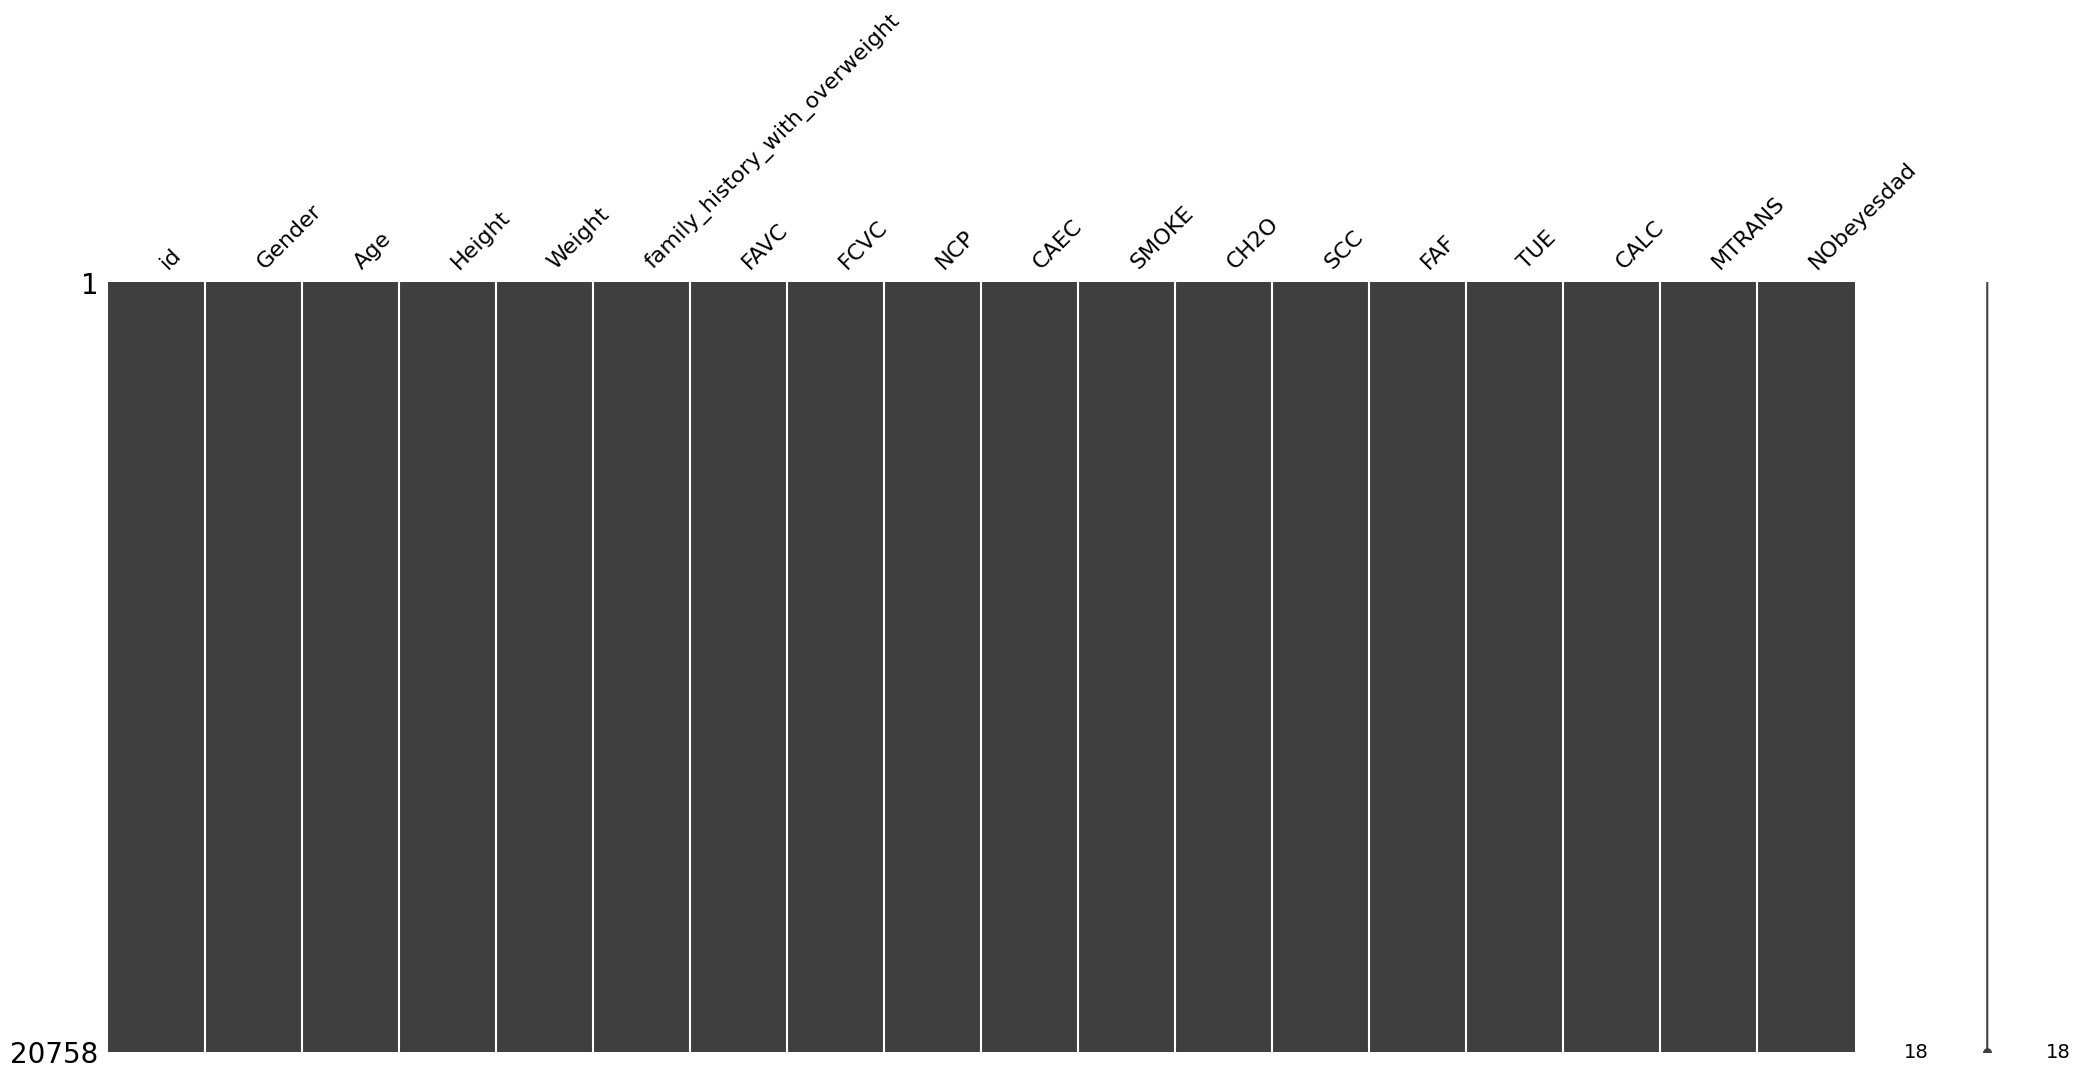

In [9]:
# from missingno library (imported above)
msno.matrix(train)

<Axes: >

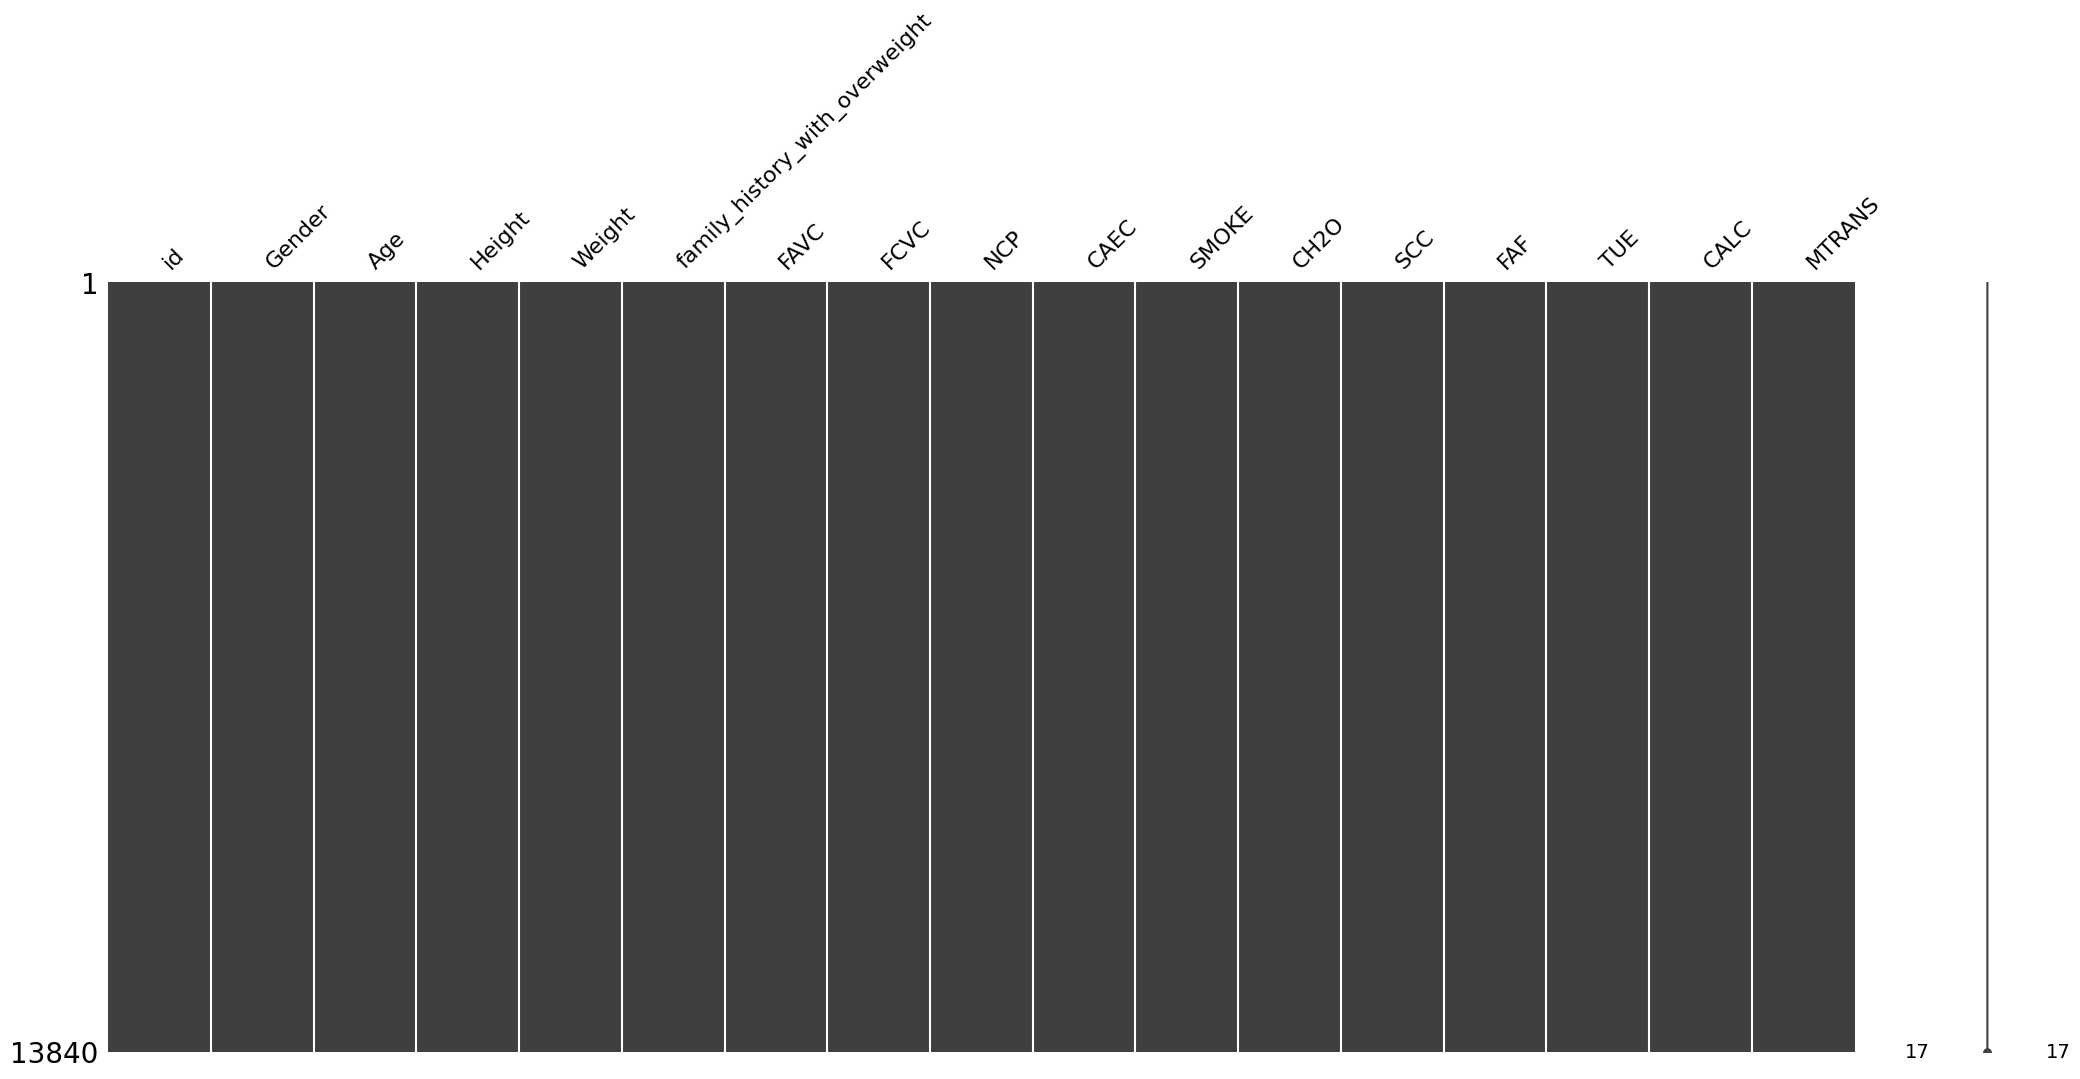

In [10]:
msno.matrix(test)

Checking the cardinality (number of unique values)

In [11]:
train.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [13]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [14]:
# categorical columns 
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
# numerical columns 
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [15]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

Train Data

In [16]:
X.describe().T.style.background_gradient(cmap='Reds')

Test Data

In [17]:
test.describe().T.style.background_gradient(cmap='Reds')

Original Data

In [18]:
org_data.describe().T.style.background_gradient(cmap='Reds')

Categorical Values Analysis

Number of instances for each unique value in column Gender:
Gender
Female    10422
Male      10336
Name: count, dtype: int64


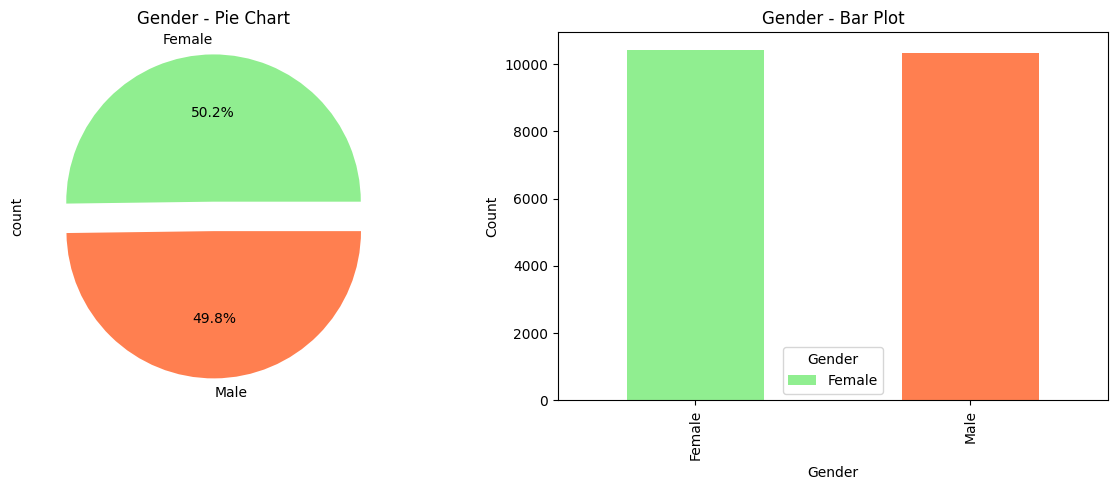

Number of instances for each unique value in column family_history_with_overweight:
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64


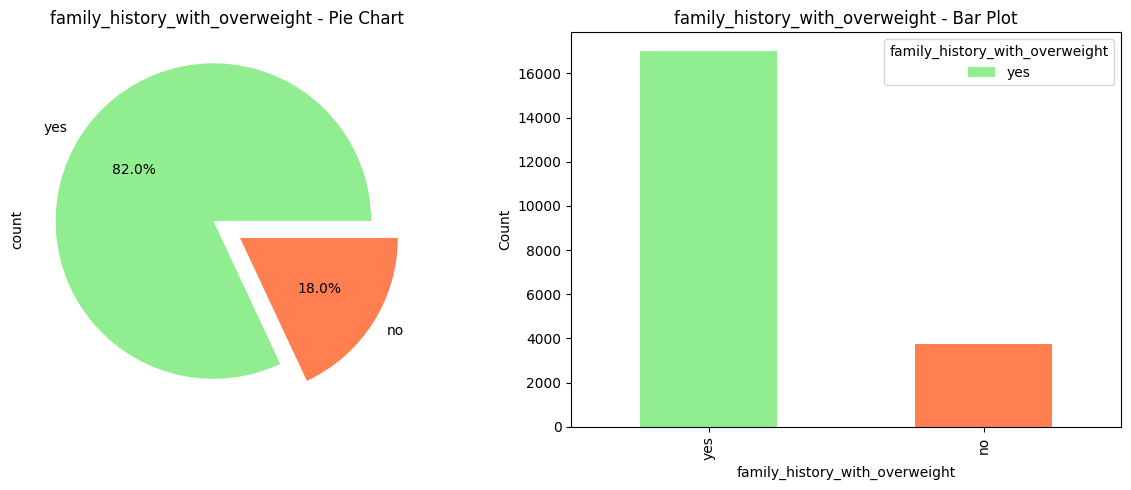

Number of instances for each unique value in column FAVC:
FAVC
yes    18982
no      1776
Name: count, dtype: int64


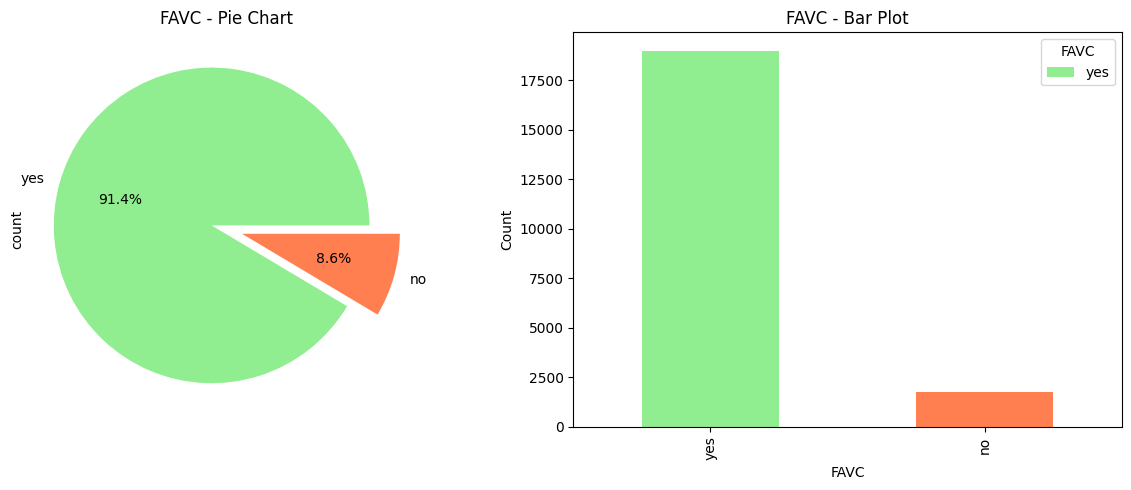

Number of instances for each unique value in column CAEC:
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64


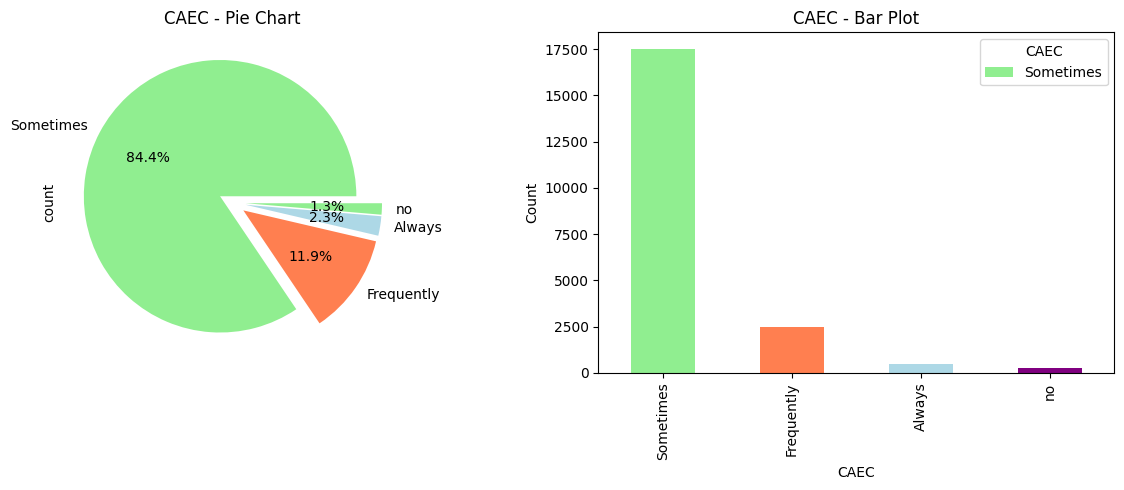

Number of instances for each unique value in column SMOKE:
SMOKE
no     20513
yes      245
Name: count, dtype: int64


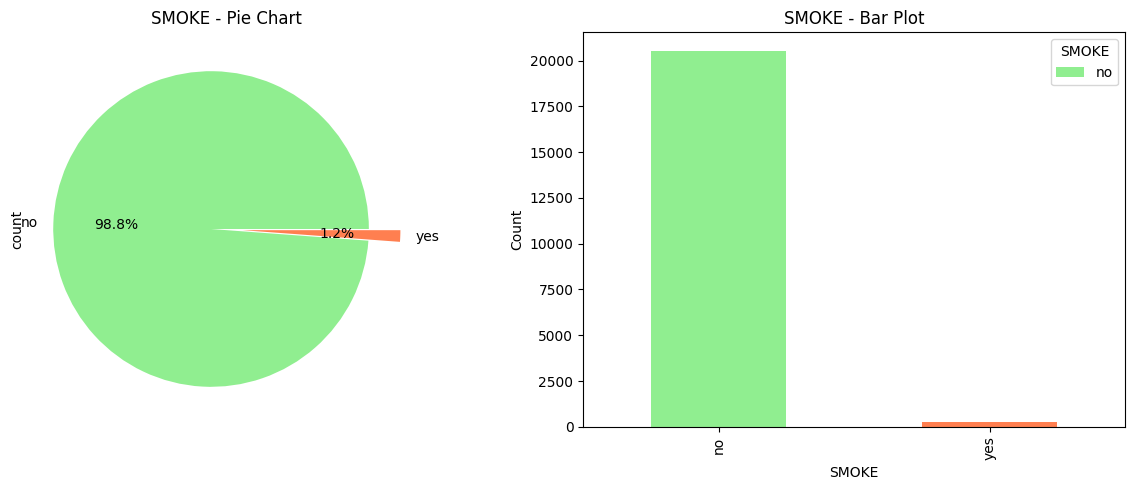

Number of instances for each unique value in column SCC:
SCC
no     20071
yes      687
Name: count, dtype: int64


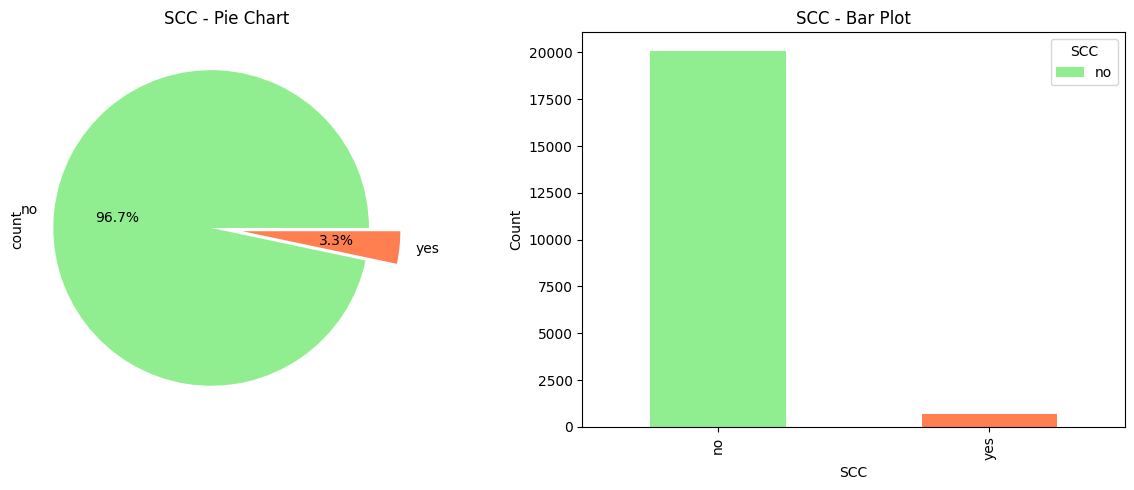

Number of instances for each unique value in column CALC:
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64


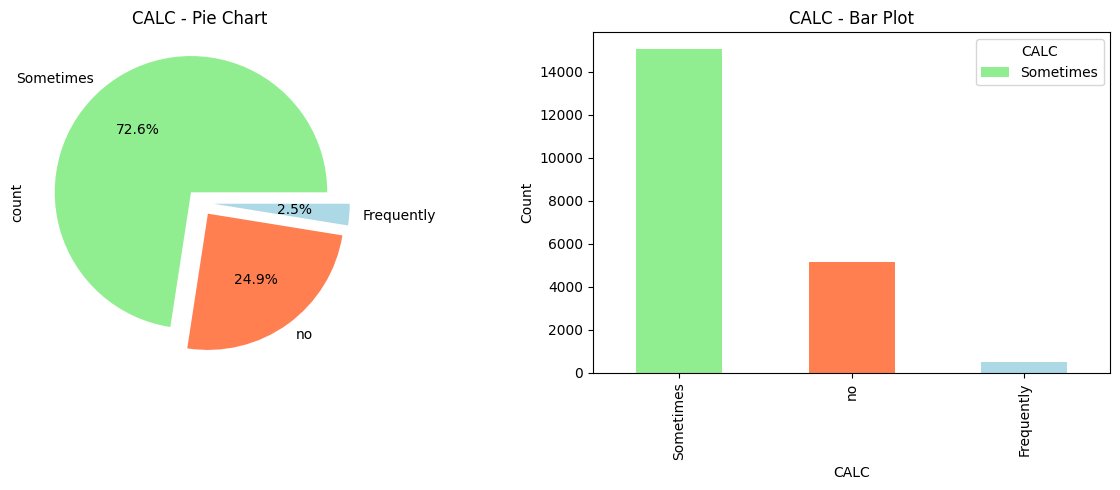

Number of instances for each unique value in column MTRANS:
MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64


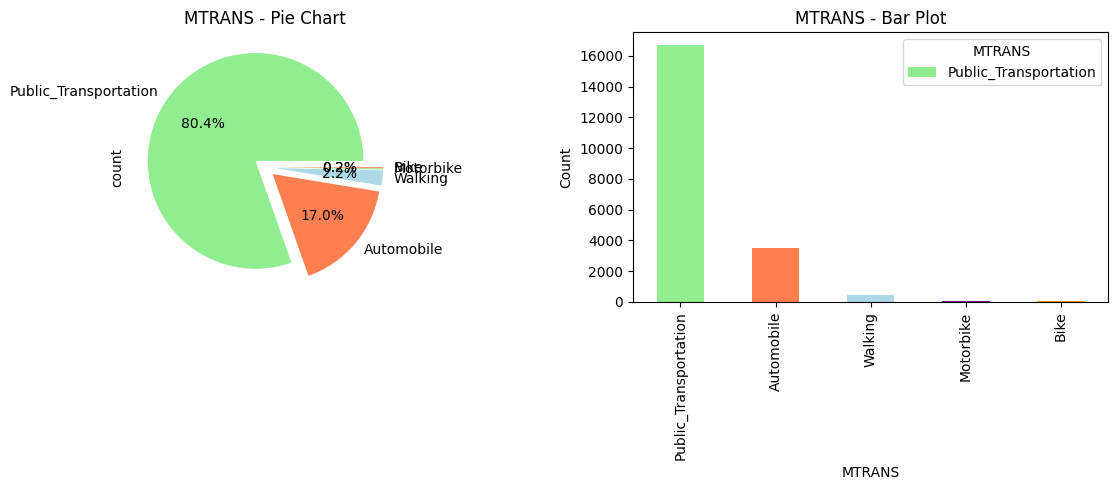

In [19]:
# Define colors for the pie chart and bar plot
pie_colors = ['lightgreen', 'coral', 'lightblue']  # Define colors for pie chart slices
bar_colors = ['lightgreen', 'coral', 'lightblue', 'purple', 'orange', 'red', 'salmon']  # Define colors for bar plot bars

# Plot pie chart and bar plot for each categorical column
for col in cat_cols:
    # Count the instances of each unique value in the column
    value_counts = X[col].value_counts()
    
    # Print the counts of each unique value
    print(f'Number of instances for each unique value in column {col}:')
    print(value_counts)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart
    value_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=pie_colors, explode=[0.1] * len(value_counts))
    axes[0].set_title(f'{col} - Pie Chart')
    
    # Bar plot
    value_counts.plot(kind='bar', ax=axes[1], color=bar_colors)
    axes[1].set_title(f'{col} - Bar Plot')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Count')
    axes[1].legend(title=col, labels=value_counts.index)  # Specify all unique values as labels
    
    plt.tight_layout()
    plt.show()

Numerical Values Analysis

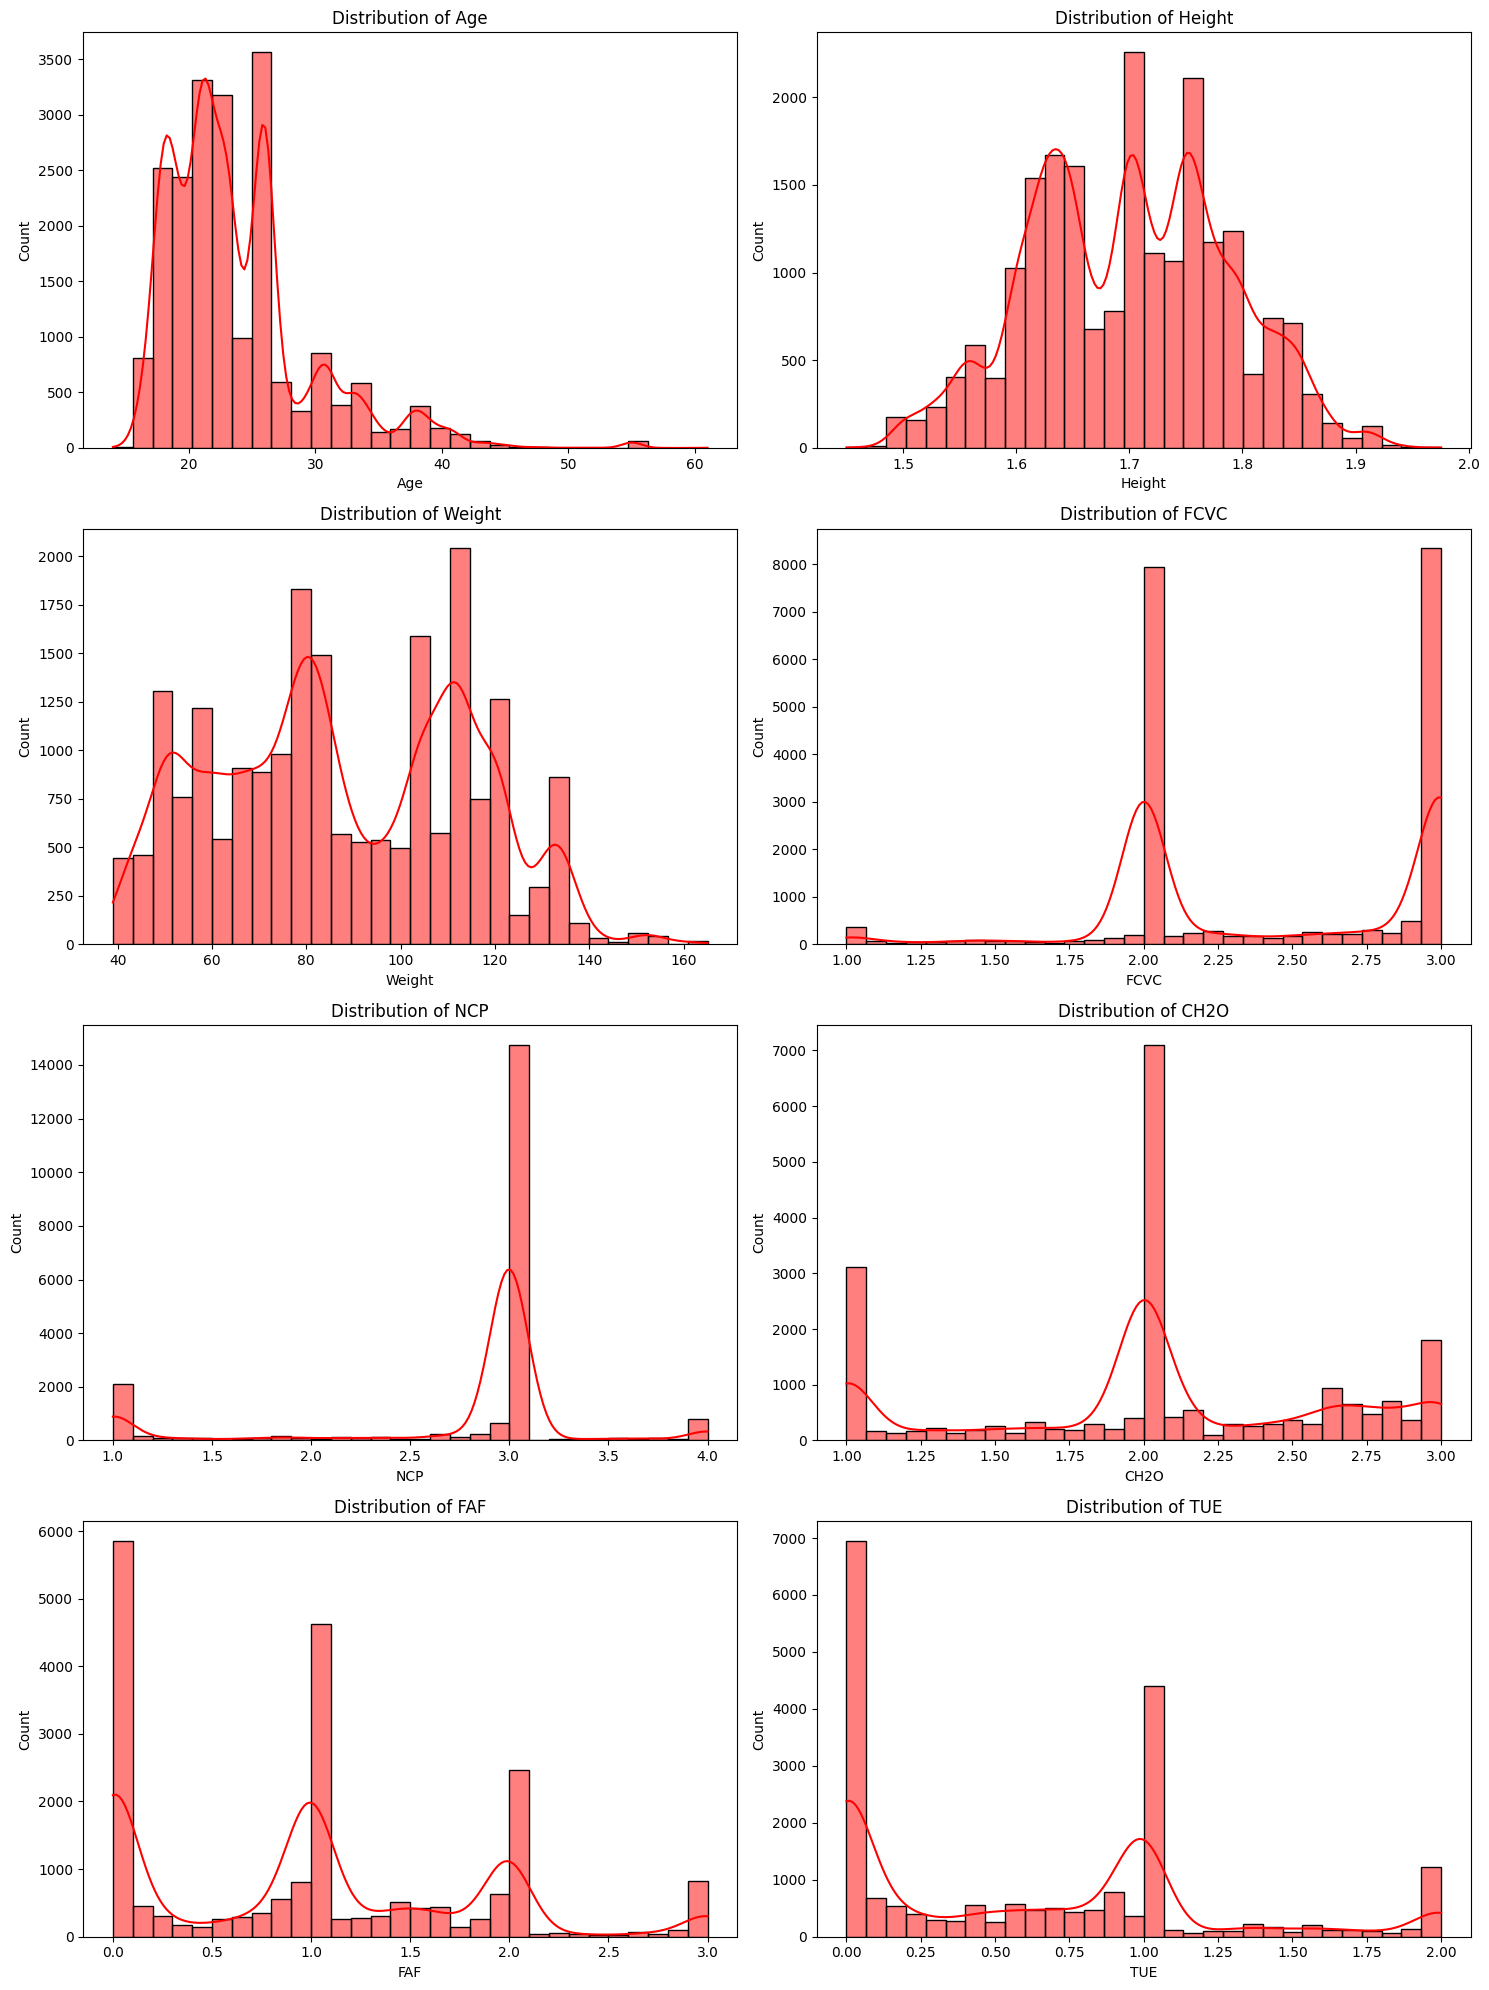

In [20]:
# Filter out the specific warning about use_inf_as_na being deprecated
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

num_rows = len(num_cols) // 2 + len(num_cols) % 2

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(num_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(X[column].replace([np.inf, -np.inf], np.nan).dropna(), kde=True, bins=30, color='red')  # Set color to maroon
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Plotting the Boxplot to analysis the data distribution and outliers

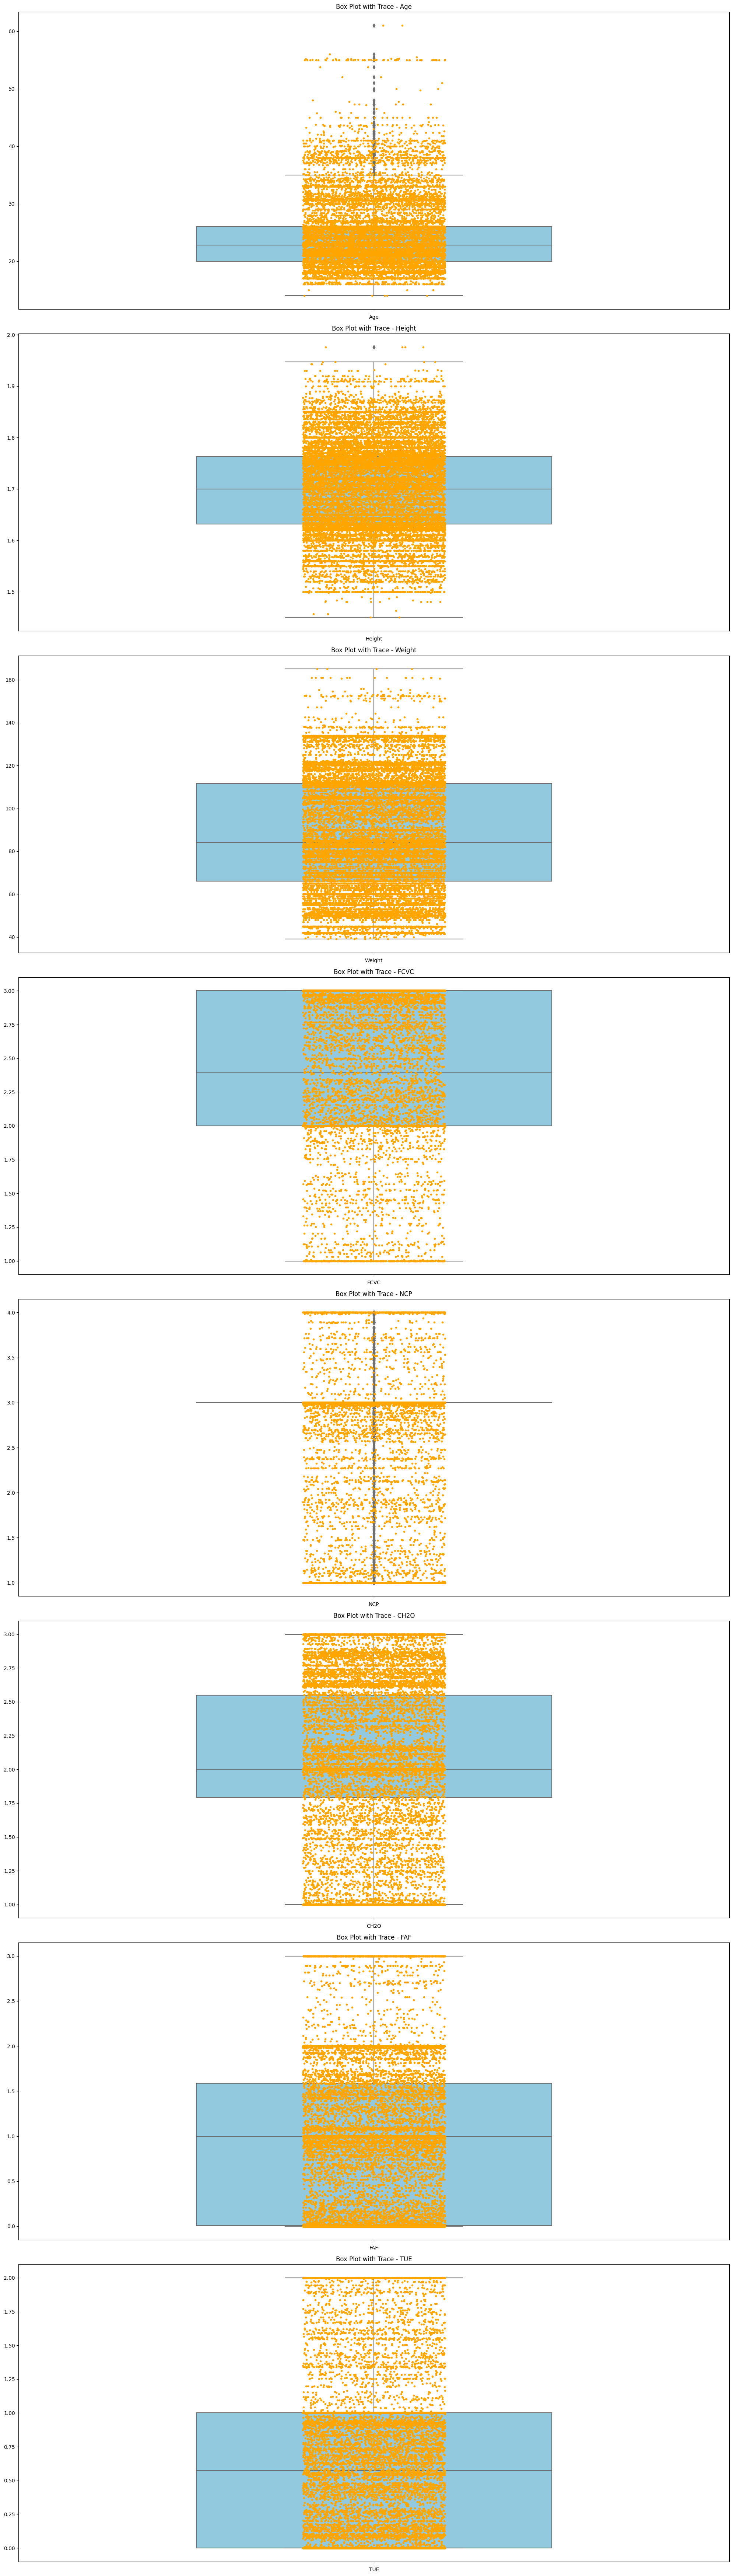

In [21]:
# Plot box plot with strip plot for each numerical column vertically
plt.figure(figsize=(20,70))
for i, column in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(y=X[column], width=0.5, linewidth=1.5, color='skyblue', fliersize=5)  # Box plot
    sns.stripplot(y=X[column], color='orange', size=4, orient='v')  # Strip plot (trace)
    plt.title(f'Box Plot with Trace - {column}')
    plt.xlabel(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In the Age column you can see clear outliers.

Cheking for the skewness 

In [22]:
skewness = X[num_cols].skew()
print(skewness)

Age       1.586252
Height    0.015803
Weight    0.093187
FCVC     -0.356611
NCP      -1.562253
CH2O     -0.212506
FAF       0.505726
TUE       0.670411
dtype: float64


Age, NCP, FAF, TUE have good amount of skewness and it needs to be fixed. The highest level of skewness is not too high. So I think log transformation will be best in this case.

Target value distrbution 

In [23]:
target_counts = y.value_counts()
print(target_counts)

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


In [24]:
org_data.iloc[:,-1]

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

Target value Distribution Comparison between the original data and synthetic data 

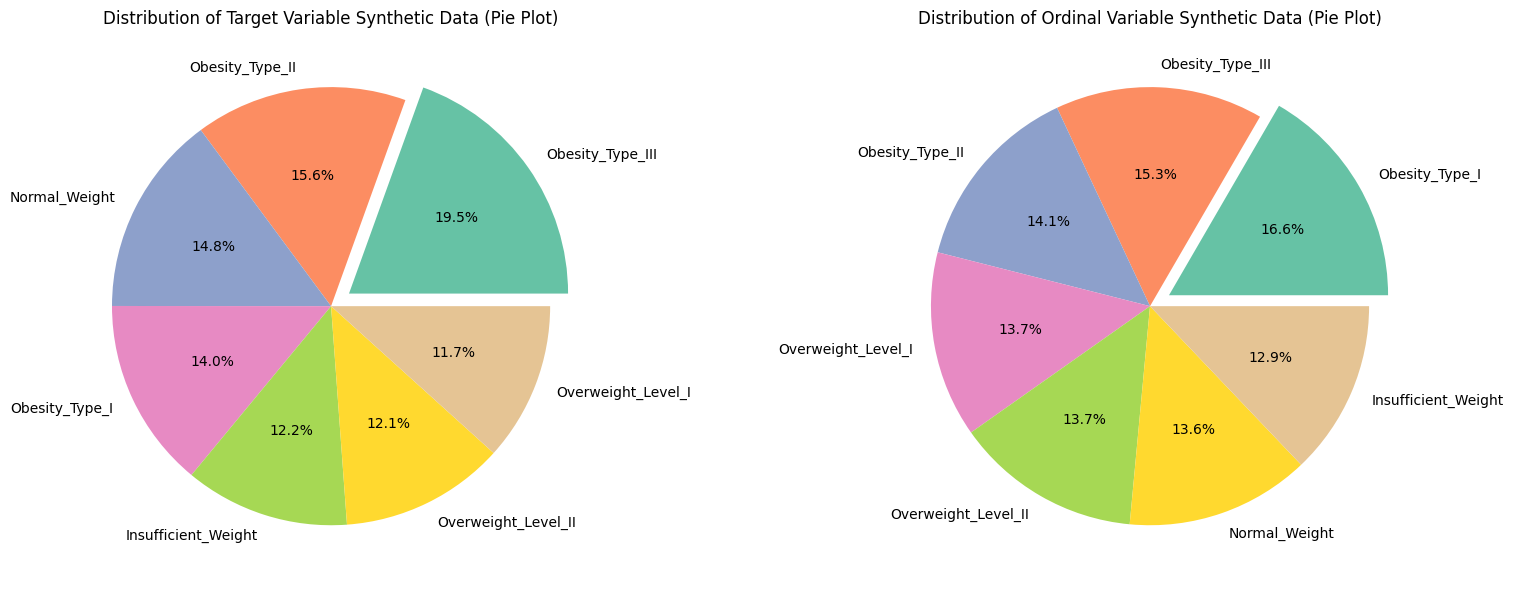

In [25]:
plt.figure(figsize=(16, 6))

# Plot the pie chart for target_counts on the left
plt.subplot(1, 2, 1)
largest_index = target_counts.argmax()
explode = [0] * len(target_counts)
explode[largest_index] = 0.1
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), explode=explode)
plt.title('Distribution of Target Variable Synthetic Data (Pie Plot)')

# Plot the pie chart for ord_data on the right
plt.subplot(1, 2, 2)
ord_counts = org_data.iloc[:,-1].value_counts()
largest_index_ord = ord_counts.argmax()
explode_ord = [0] * len(ord_counts)
explode_ord[largest_index_ord] = 0.1
plt.pie(ord_counts, labels=ord_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), explode=explode_ord)
plt.title('Distribution of Ordinal Variable Synthetic Data (Pie Plot)')

plt.tight_layout()
plt.show()


Barplot for synthetic data

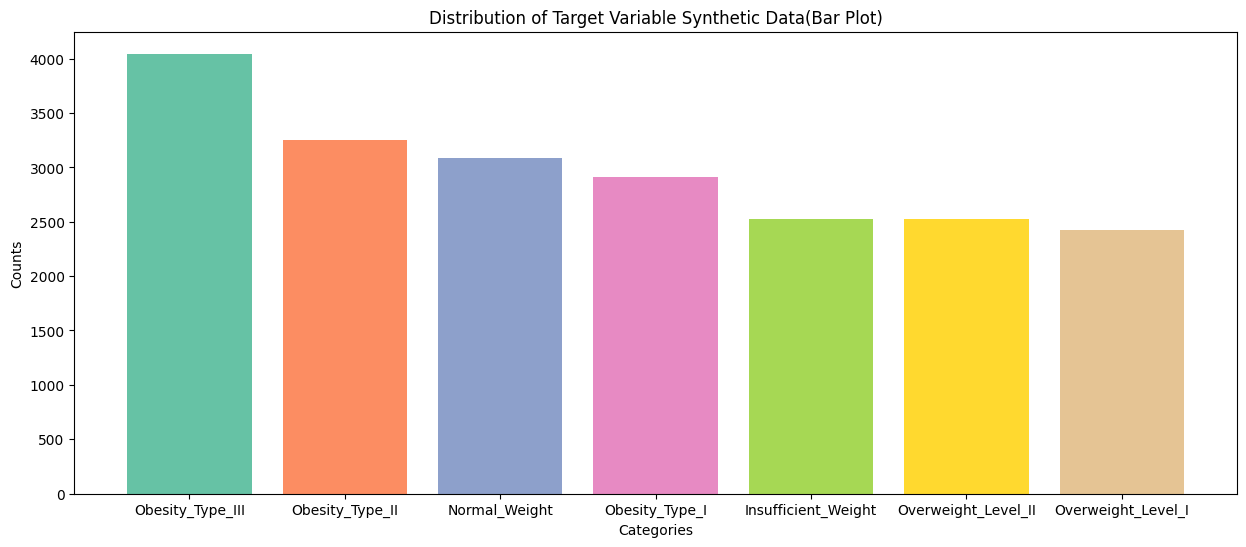

In [26]:
plt.figure(figsize=(15, 6))

plt.bar(target_counts.index, target_counts, color=sns.color_palette('Set2'))

plt.title('Distribution of Target Variable Synthetic Data(Bar Plot)')
plt.xlabel('Categories')
plt.ylabel('Counts')

plt.show()

Barplot for Original Data 

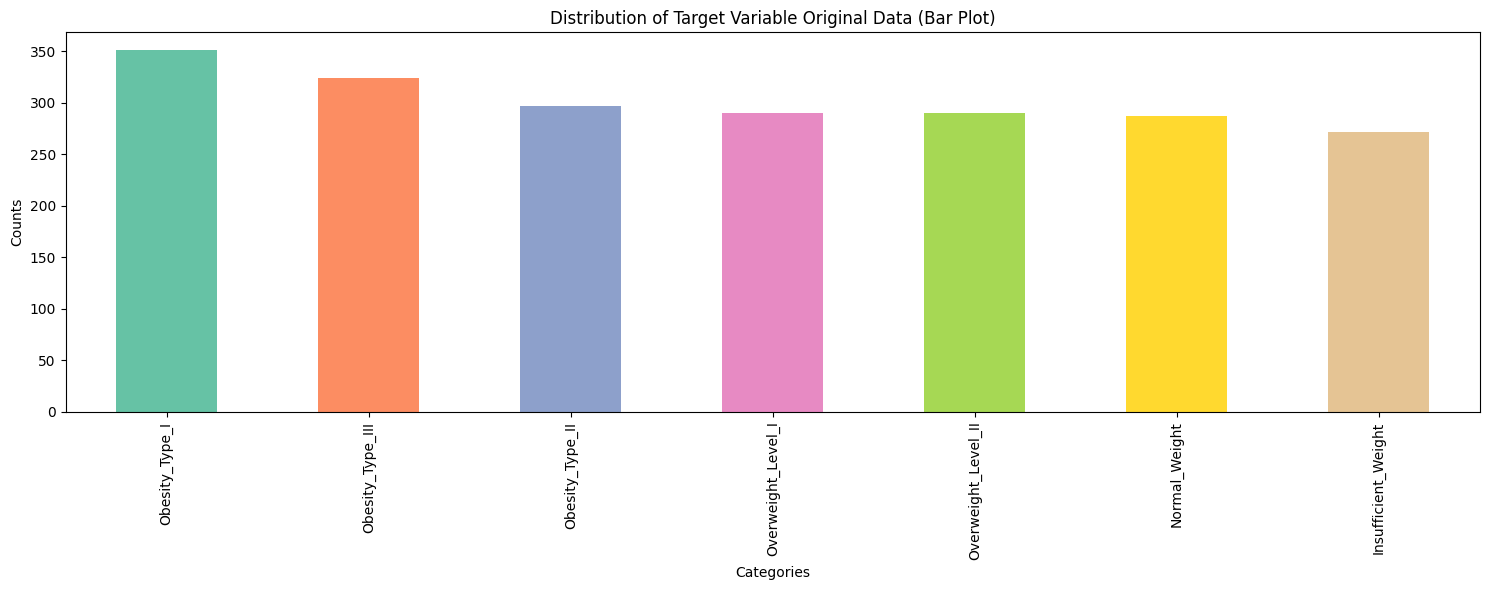

In [27]:
plt.figure(figsize=(15, 6))
ord_counts.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Distribution of Target Variable Original Data (Bar Plot)')
plt.xlabel('Categories')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

Distribution of the features

Refrence Taken From : - https://www.kaggle.com/code/ashishkumarak/ps3e26-liver-cirrhosis-eda-model#%F0%9F%93%8A-Exploratory-Data-Analysis

In [28]:
test_to_scale = test[num_cols]
train_to_scale = X[num_cols]
train_to_scale_original = org_data[num_cols]

columns = list(train_to_scale_original.columns)
ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]
fig = make_subplots(rows=len(columns), cols=2)
count = 0
for row in range(int(len(columns))) : 
    random_col = f"RGB({random.randint(100, 255)}, {random.randint(100, 255)}, {random.randint(150, 255)})"
    fig.add_trace(go.Violin(y=train_to_scale[num_cols][columns[count]], x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 1)
    fig.add_trace(go.Violin(y= train_to_scale_original[columns[count]],x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 2)
 
    
    count +=1


fig.update_layout(height=2600, width=1000, title_text="Feature Distribution in Synthetic (Left) vs Original Dataset (Right)",showlegend=False,paper_bgcolor= '#F5F5F5')
fig.show()

There are not much difference in the synthetically generated data and original data.

In [29]:
pd.DataFrame(y.value_counts())

count
NObeyesdad                
Obesity_Type_III      4046
Obesity_Type_II       3248
Normal_Weight         3082
Obesity_Type_I        2910
Insufficient_Weight   2523
Overweight_Level_II   2522
Overweight_Level_I    2427

In [30]:
classes = list(y.unique())

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]
def col_per_class(col):
    fig = go.Figure()
    for clas in classes : 
        fig.add_trace(go.Violin(y = train[col][train['NObeyesdad']== clas],   box_visible=True,
                            meanline_visible=True , x = train['NObeyesdad'][train['NObeyesdad'] == clas], name = clas ))
        fig.update_layout(title = f'Distribution for {col} for each class', plot_bgcolor = ultra_light_colors[np.random.randint(1,10)],paper_bgcolor= '#F5F5F5', height=400,  
        width=1000 )
    return fig
for i in train_to_scale : 
    fig = col_per_class(i)
    fig.show()

Correlation Matix 

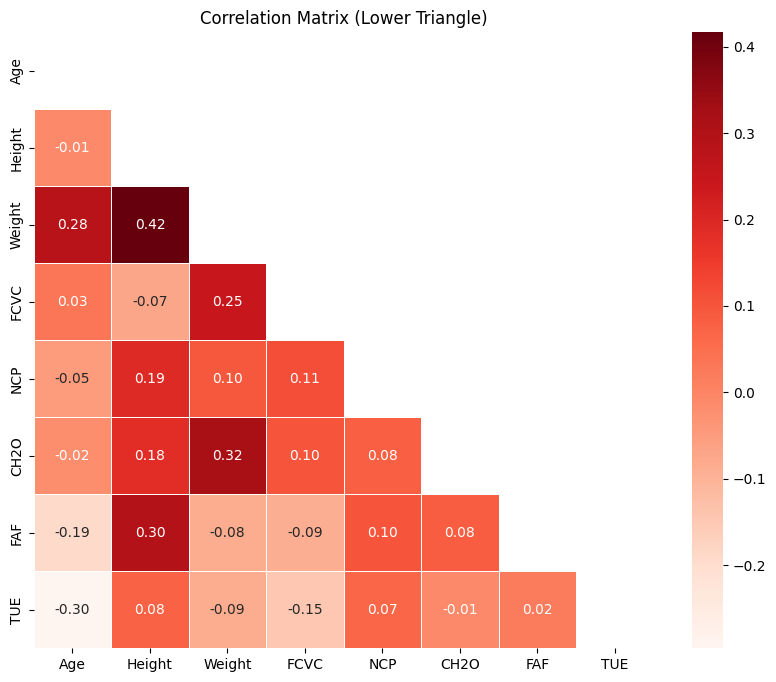

In [31]:
correlation_matrix = train_to_scale.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(X[num_cols].corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

# 3. Pre - Processing  

Label Encoding the Taget Variable

In [32]:
le = LabelEncoder()

y_encoded = le.fit_transform(y)
y_encoded = pd.DataFrame(y_encoded)
y_encoded.head()

0
0  6
1  1
2  0
3  4
4  6

In [33]:
X = pd.DataFrame(X)

Dropping the id column

In [34]:
id = test['id']

In [35]:
X.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)
print(X)
print(test)

       Gender        Age    Height      Weight family_history_with_overweight  \
0        Male  24.443011  1.699998   81.669950                            yes   
1      Female  18.000000  1.560000   57.000000                            yes   
2      Female  18.000000  1.711460   50.165754                            yes   
3      Female  20.952737  1.710730  131.274851                            yes   
4        Male  31.641081  1.914186   93.798055                            yes   
...       ...        ...       ...         ...                            ...   
20753    Male  25.137087  1.766626  114.187096                            yes   
20754    Male  18.000000  1.710000   50.000000                             no   
20755    Male  20.101026  1.819557  105.580491                            yes   
20756    Male  33.852953  1.700000   83.520113                            yes   
20757    Male  26.680376  1.816547  118.134898                            yes   

      FAVC      FCVC       

OneHotEncoding the categorical variables and Scaling the numerical value 

In [36]:
ct_encode_scale = ColumnTransformer(
    transformers=[
        ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('standard_scaler', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)
ct_encode_scale

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS']),
                                ('standard_scaler', StandardScaler(),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE'])])

Making the Pipeline for the Preprocessing 

In [37]:
# Define pipeline with ColumnTransformers
pipe_preprocess = Pipeline(steps = [
    ('preprocessing', ct_encode_scale),
], verbose=False)
pipe_preprocess

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])]))])

In [38]:
# Transform data
X_transformed = pipe_preprocess.fit_transform(X)

print(X_transformed)

[[ 0.          1.          0.         ...  1.20659365 -1.17114146
   0.59743795]
 [ 1.          0.          0.         ... -0.0483493   0.02177483
   0.63651292]
 [ 1.          0.          0.         ... -0.19564431 -0.13802227
   1.75523929]
 ...
 [ 0.          1.          0.         ... -0.0483493   0.21030332
   0.96609163]
 [ 0.          1.          0.         ...  0.18969399 -1.17114146
   0.59305495]
 [ 0.          1.          0.         ... -0.04249346 -0.35460577
   0.16121399]]


In [39]:
X_transformed = pd.DataFrame(X_transformed)
y_encoded = pd.DataFrame(y_encoded)

In [40]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 4. Model Training 

# 4.1. XGBoost

In [41]:
# def objective(trial):
#     # Define hyperparameters to tune
#     params = {
#         'objective': 'multi:softmax',
#         'num_class': len(np.unique(y_train)),  # Number of unique classes in the target variable
#         'eval_metric': 'merror',
#         'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
#         'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
#         'alpha': trial.suggest_float('alpha', 1e-8, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'eta': trial.suggest_float('eta', 1e-8, 1.0),
#         'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
#         'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
#     }
    
#     # Create DMatrix for XGBoost
#     dtrain = xgb.DMatrix(X_train, label=y_train)
#     dval = xgb.DMatrix(X_val, label=y_val)
    
#     # Train the model
#     model = xgb.train(params, dtrain, evals=[(dval, 'eval')], early_stopping_rounds=10, verbose_eval=False)
    
#     # Predict validation set
#     y_pred = model.predict(dval)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(X_train, y_train)

# # Predict test set
# y_pred = best_model.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'booster': 'gbtree', 'lambda': 0.5821098766706904, 'alpha': 0.8986936569869541, 'max_depth': 14, 'eta': 0.6356670481509615, 'gamma': 0.5086177014683808, 'grow_policy': 'lossguide'}

Accuracy: 0.9079961464354528

Confusion Matrix:

[[478  25   0   0   0   2   0]
 
 [ 33 547   1   0   0  26  10]
 
 [  1   1 519  19   3   9  30]
 
 [  0   0  20 629   0   0   1]
 
 [  0   0   1   1 806   1   0]
 
 [  1  43   5   0   0 377  59]
 
 [  0   8  34   4   0  44 414]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       505
           1       0.88      0.89      0.88       617
           2       0.89      0.89      0.89       582
           3       0.96      0.97      0.97       650
           4       1.00      1.00      1.00       809
           5       0.82      0.78      0.80       485
           6       0.81      0.82      0.81       504

    accuracy                           0.91      4152

In [42]:
xgb_params = {'booster': 'gbtree', 'lambda': 0.5821098766706904, 'alpha': 0.8986936569869541, 'max_depth': 14, 'eta': 0.6356670481509615, 'gamma': 0.5086177014683808, 'grow_policy': 'lossguide'}

# Create a separate pipeline called lgb_pipe with best hyperparameters
xgb_pipe = Pipeline([
    ('preprocessing pipeline', pipe_preprocess),
    ('lgbm', XGBClassifier(**xgb_params))
])
xgb_pipe

Pipeline(steps=[('preprocessing pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS']),
                                                                  ('standard_scaler',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP...
                               gamma=0.5086177014683808,
                               grow_policy='lossguide', importance_type=None,
                               interaction_constraints=None,
                               lambda=0.5821098766706904, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=14, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, ...))])

In [43]:
xgb_pipe.fit(X, y_encoded)

Pipeline(steps=[('preprocessing pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS']),
                                                                  ('standard_scaler',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP...
                               gamma=0.5086177014683808,
                               grow_policy='lossguide', importance_type=None,
                               interaction_constraints=None,
                               lambda=0.5821098766706904, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=14, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, ...))])

# 4.2. LightGBM

In [44]:
# def objective(trial):
    
#     # Define hyperparameters to tune
#     params = {
#         'objective': 'multiclass',
#         'metric': 'multi_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1.0),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'num_class': len(np.unique(y_train)),  # Number of unique classes in the target variable
#         'random_state': 42
#     }
    
#     # Create LightGBM classifier with hyperparameters
#     lgb_clf = LGBMClassifier(**params)
    
#     # Train the model
#     lgb_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = lgb_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_lgb_clf = LGBMClassifier(**best_params, random_state=42)
# best_lgb_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_lgb_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'lambda_l1': 2.369791281652156, 'lambda_l2': 2.5517725934225743, 'num_leaves': 194, 'max_depth': 10, 'learning_rate': 0.17808991308602645, 'feature_fraction': 0.46176817852780805, 'bagging_fraction': 0.5291173425798957, 'bagging_freq': 9, 'min_child_samples': 5}

Accuracy: 0.9128131021194605

Confusion Matrix:

[[480  24   0   0   0   1   0]
 
 [ 28 559   1   0   0  20   9]
 
 [  1   1 523  15   3  10  29]
 
 [  0   0  13 637   0   0   0]
 
 [  0   0   2   1 806   0   0]
 
 [  1  42   7   0   0 374  61]
 
 [  0   9  42   3   0  39 411]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       505
           1       0.88      0.91      0.89       617
           2       0.89      0.90      0.89       582
           3       0.97      0.98      0.98       650
           4       1.00      1.00      1.00       809
           5       0.84      0.77      0.81       485
           6       0.81      0.82      0.81       504

    accuracy                           0.91      4152

In [45]:
lgb_params = {'lambda_l1': 2.369791281652156, 'lambda_l2': 2.5517725934225743, 'num_leaves': 194, 'max_depth': 10, 'learning_rate': 0.17808991308602645, 'feature_fraction': 0.46176817852780805, 'bagging_fraction': 0.5291173425798957, 'bagging_freq': 9, 'min_child_samples': 5} 

# Create a separate pipeline called lgb_pipe with best hyperparameters
lgb_pipe = Pipeline([
    ('preprocessing pipeline', pipe_preprocess),
    ('lgbm', LGBMClassifier(**lgb_params))
])
lgb_pipe

Pipeline(steps=[('preprocessing pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS']),
                                                                  ('standard_scaler',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE'])]))])),
                ('lgbm',
                 LGBMClassifier(bagging_fraction=0.5291173425798957,
                                bagging_freq=9,
                                feature_fraction=0.46176817852780805,
                                lambda_l1=2.369791281652156,
                                lambda_l2=2.5517725934225743,
                                learning_rate=0.17808991308602645, max_depth=10,
                                min_child_samples=5, num_leaves=194))])

In [46]:
# Train the pipeline on the entire dataset
lgb_pipe.fit(X, y_encoded)

[LightGBM] [Warning] feature_fraction is set=0.46176817852780805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46176817852780805
[LightGBM] [Warning] lambda_l2 is set=2.5517725934225743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5517725934225743
[LightGBM] [Warning] lambda_l1 is set=2.369791281652156, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.369791281652156
[LightGBM] [Warning] bagging_fraction is set=0.5291173425798957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5291173425798957
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.46176817852780805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46176817852780805
[LightGBM] [Warning] lambda_l2 is set=2.5517725934225743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5517725934225743
[LightGBM] [Warning] lambda_l1 is 

Pipeline(steps=[('preprocessing pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS']),
                                                                  ('standard_scaler',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE'])]))])),
                ('lgbm',
                 LGBMClassifier(bagging_fraction=0.5291173425798957,
                                bagging_freq=9,
                                feature_fraction=0.46176817852780805,
                                lambda_l1=2.369791281652156,
                                lambda_l2=2.5517725934225743,
                                learning_rate=0.17808991308602645, max_depth=10,
                                min_child_samples=5, num_leaves=194))])

# 4.3.CatBoost Model

In [47]:
# def objective(trial):
    
#     # Define hyperparameters to tune
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
#         'random_strength': trial.suggest_float('random_strength', 0.0, 10.0),
#     }
    
#     # Create CatBoost classifier with hyperparameters
#     catboost_clf = CatBoostClassifier(**params, random_state=42, verbose=False)
    
#     # Train the model
#     catboost_clf.fit(X_train, y_train)
    
#     # Predict validation set.
#     y_pred = catboost_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_catboost_clf = CatBoostClassifier(**best_params, random_state=42, verbose=False)
# best_catboost_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_catboost_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'n_estimators': 800, 'learning_rate': 0.053695126830349084, 'max_depth': 5, 'colsample_bylevel': 0.6986465633187219, 'bagging_temperature': 0.45781361556452393, 'random_strength': 4.216396114990844}

Accuracy: 0.9089595375722543

Confusion Matrix:

[[483  21   0   0   0   1   0]

[ 31 548   2   0   0  27   9]

[  1   0 524  17   3  10  27]

[  0   0  19 631   0   0   0]

[  0   0   2   1 806   0   0]

[  1  39  11   0   0 374  60]

[  0   3  37   7   0  49 408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       505
           1       0.90      0.89      0.89       617
           2       0.88      0.90      0.89       582
           3       0.96      0.97      0.97       650
           4       1.00      1.00      1.00       809
           5       0.81      0.77      0.79       485
           6       0.81      0.81      0.81       504

    accuracy                           0.91      4152

In [48]:
cat_params = {'n_estimators': 800, 'learning_rate': 0.053695126830349084, 'max_depth': 5, 'colsample_bylevel': 0.6986465633187219, 'bagging_temperature': 0.45781361556452393, 'random_strength': 4.216396114990844}

cat_pipe = Pipeline(steps = [
    ('preprocessing pipeline', pipe_preprocess),
    ('catboost_model', CatBoostClassifier(**cat_params))
])
cat_pipe

Pipeline(steps=[('preprocessing pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS']),
                                                                  ('standard_scaler',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE'])]))])),
                ('catboost_model',
                 <catboost.core.CatBoostClassifier object at 0x7b6540e40d00>)])

In [49]:
cat_pipe.fit(X,y_encoded)

0:	learn: 1.7994405	total: 90.3ms	remaining: 1m 12s
1:	learn: 1.6928003	total: 114ms	remaining: 45.7s
2:	learn: 1.6042965	total: 136ms	remaining: 36.2s
3:	learn: 1.5327151	total: 159ms	remaining: 31.7s
4:	learn: 1.4566588	total: 181ms	remaining: 28.8s
5:	learn: 1.4055833	total: 204ms	remaining: 27s
6:	learn: 1.3484584	total: 227ms	remaining: 25.7s
7:	learn: 1.2939275	total: 249ms	remaining: 24.7s
8:	learn: 1.2544069	total: 272ms	remaining: 23.9s
9:	learn: 1.2131328	total: 296ms	remaining: 23.4s
10:	learn: 1.1709436	total: 319ms	remaining: 22.9s
11:	learn: 1.1316083	total: 341ms	remaining: 22.4s
12:	learn: 1.0914891	total: 364ms	remaining: 22s
13:	learn: 1.0696129	total: 382ms	remaining: 21.4s
14:	learn: 1.0426450	total: 401ms	remaining: 21s
15:	learn: 1.0131195	total: 420ms	remaining: 20.6s
16:	learn: 0.9919193	total: 435ms	remaining: 20s
17:	learn: 0.9658322	total: 453ms	remaining: 19.7s
18:	learn: 0.9403729	total: 472ms	remaining: 19.4s
19:	learn: 0.9177575	total: 488ms	remaining: 19

Pipeline(steps=[('preprocessing pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS']),
                                                                  ('standard_scaler',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE'])]))])),
                ('catboost_model',
                 <catboost.core.CatBoostClassifier object at 0x7b6540e40d00>)])

Got almost same accuracy for all the models XGBoost, LightGBM, CatBoost and got same accuracy_score of 0.91. For the submission purpose I am going with the catboost model. You can use other models too through there pipelines.

# 5. Making the Prediction

In [50]:
transformed_test = cat_pipe[:-1].transform(test)  # Apply transformers excluding the final estimator
y_pred = cat_pipe[-1].predict(transformed_test)  # Predict using the final estimator
print(y_pred)

[[3]
 [5]
 [4]
 ...
 [0]
 [1]
 [3]]


In [51]:
y_submission = le.inverse_transform(y_pred)
y_submission = pd.DataFrame(y_submission, columns=['NObeyesdad'])
y_submission.head()

NObeyesdad
0     Obesity_Type_II
1  Overweight_Level_I
2    Obesity_Type_III
3      Obesity_Type_I
4    Obesity_Type_III

# 6. Making Submission File

In [52]:
submission_to_do = pd.concat([id, y_submission], axis = 1)
submission_to_do.to_csv('submission.csv', index = False)